## Part 3

In [1]:
import sys

In [2]:
!pip install a-world-of-countries

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 4.5 MB/s eta 0:00:00


In [3]:
import os
import time
import subprocess
from matplotlib import pyplot as plt
import datetime
import pandas as pd

from pyspark.sql.functions import *
from pyspark.sql.types import *

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

import awoc
my_world = awoc.AWOC()

In [4]:
warnings.filterwarnings(action='ignore')
spark = SparkSession.builder.getOrCreate()

spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

spark.conf.set("spark.sql.legacy.timeParserPolicy","LEGACY")

In [5]:
bucket_name = 'ksr-tweet-bucket'
prefix = 'processed'

df = spark.read.parquet('gs://' + bucket_name + '/' + prefix + '/')

23/03/10 19:10:14 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+----------+-------+
|year_month|  count|
+----------+-------+
|   2022-04|3365720|
|   2022-05|4006256|
|   2022-06|3794653|
|   2022-07|3585048|
|   2022-08|4236183|
|   2022-09|4609554|
|   2022-10|4311356|
|   2022-11|4194720|
|   2022-12|3483307|
|   2023-01|3810761|
|   2023-02| 990661|
+----------+-------+



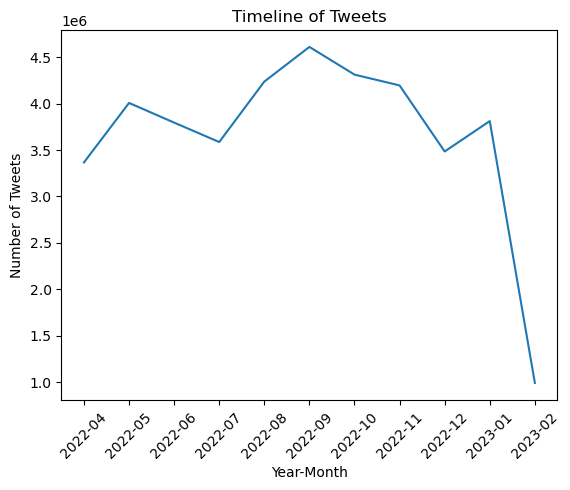

In [ ]:
from pyspark.sql.functions import to_timestamp, date_format, col

# Convert tweet_created_at to timestamp format
df = df.withColumn("tweet_created_at", to_timestamp(col("tweet_created_at"), "EEE MMM dd HH:mm:ss ZZZZZ yyyy"))

# Group tweets by year and month, and count the number of tweets for each month
timeline = df.groupBy(date_format("tweet_created_at", "yyyy-MM").alias("year_month")).count().sort("year_month")

# Show timeline
timeline.show()

# Plot timeline
import matplotlib.pyplot as plt

year_months = [row.year_month for row in timeline.collect()]
counts = [row['count'] for row in timeline.collect()]

plt.plot(year_months, counts)
plt.title("Timeline of Tweets")
plt.xlabel("Year-Month")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45) 
plt.show()

+----------+-----+
|year_month|count|
+----------+-----+
|   2022-04| 4658|
|   2022-05|  554|
|   2022-06|  337|
|   2022-07|  573|
|   2022-08| 1339|
|   2022-09| 1638|
|   2022-10|  349|
|   2022-11|  774|
|   2022-12| 1235|
|   2023-01| 2272|
|   2023-02|  739|
+----------+-----+



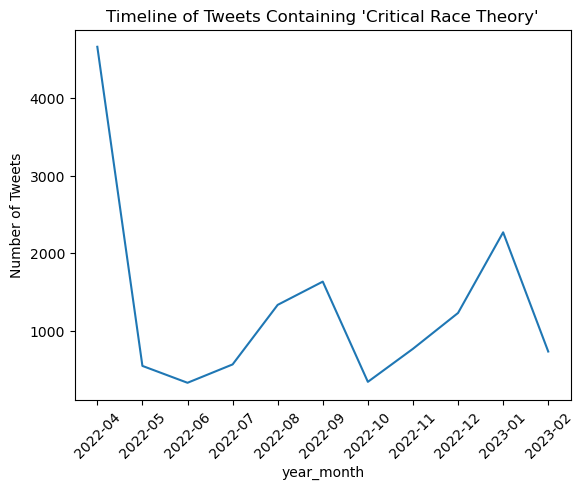

In [ ]:
from pyspark.sql.functions import to_timestamp, date_format, col

# Filter dataframe to only include tweets containing the phrase "critical race theory"
df_crt = df.filter(col("tweet_text").rlike("critical race theory"))

# Convert tweet_created_at to timestamp format
df_crt = df_crt.withColumn("tweet_created_at", to_timestamp(col("tweet_created_at"), "EEE MMM dd HH:mm:ss ZZZZZ yyyy"))

# Group tweets by date and count the number of tweets for each day
timeline_crt = df_crt.groupBy(date_format("tweet_created_at", "yyyy-MM").alias("year_month")).count().sort("year_month")

# Show timeline
timeline_crt.show()

# Plot timeline
import matplotlib.pyplot as plt

year_months = [row.year_month for row in timeline_crt.collect()]
counts = [row['count'] for row in timeline_crt.collect()]

plt.plot(year_months, counts)
plt.title("Timeline of Tweets Containing 'Critical Race Theory'")
plt.xlabel("year_month")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45) 
plt.show()

In [21]:
from pyspark.sql.functions import col, lower

filtered_df = df.filter(
    (lower(col("tweet_text")).contains("critical race theory"))
)

In [22]:
filtered_df.count()

34611

In [3]:
locations_df = filtered_df.groupBy("user_location").count()

In [6]:
from pyspark.sql.functions import count

# Group by user_location and count the occurrences
location_counts = df.groupBy('user_location').agg(count('*').alias('count'))

# Show the top 10 locations by count
location_counts.orderBy('count', ascending=False).show(10)

+---------------+--------+
|  user_location|   count|
+---------------+--------+
|           null|15637191|
|  United States|  418100|
| Lagos, Nigeria|  258689|
|        Nigeria|  233503|
|          India|  208778|
|            USA|  148671|
|Los Angeles, CA|  128698|
|California, USA|  128250|
|London, England|  118432|
|    Chicago, IL|  111863|
+---------------+--------+
only showing top 10 rows



In [ ]:
from pyspark.sql.functions import col

# Filter tweets related to critical race theory
crt_tweets = df.filter(col("tweet_text").contains("critical race theory"))

# Group by user location and count the number of tweets
locations = crt_tweets.groupBy("user_location").count().sort(col("count").desc())

# Show the locations and tweet counts
locations.show()

+--------------------+-----+
|       user_location|count|
+--------------------+-----+
|                null| 6174|
|       United States|  373|
|                 USA|  196|
|        Florida, USA|  144|
|          Texas, USA|  109|
|     California, USA|  102|
|      Washington, DC|   73|
|               Texas|   71|
|     Los Angeles, CA|   50|
|Inside Higher Edu...|   48|
|               Earth|   42|
|              Canada|   42|
|       Michigan, USA|   41|
|             Florida|   39|
|     New Jersey, USA|   39|
|       New York, USA|   38|
|         Chicago, IL|   37|
|        New York, NY|   36|
|       Virginia, USA|   35|
|   Pennsylvania, USA|   35|
+--------------------+-----+
only showing top 20 rows



In [6]:
from pyspark.sql.functions import col

# Filter tweets related to critical race theory
hijab_tweets = df.filter(col("tweet_text").contains("hijab"))

# Group by user location and count the number of tweets
locations = hijab_tweets.groupBy("user_location").count().sort(col("count").desc())

# Show the locations and tweet counts
locations.show()

+----------------+-----+
|   user_location|count|
+----------------+-----+
|            null|16127|
|           India| 1365|
|New Delhi, India|  359|
|   Mumbai, India|  330|
|Bengaluru, India|  228|
|Hyderabad, India|  208|
|   United States|  173|
| London, England|  128|
|          Mumbai|  128|
|          Bharat|  121|
|            भारत|  120|
|       New Delhi|   94|
|       Bangalore|   88|
|           Earth|   87|
|         Nigeria|   84|
|Toronto, Ontario|   74|
|  United Kingdom|   74|
|     Pune, India|   72|
|           india|   71|
|  Chennai, India|   69|
+----------------+-----+
only showing top 20 rows



In [13]:
location_df = df.select('user_id_str','user_location').distinct()\
.groupBy('user_location')\
.agg(count('*').alias('total_twitterers'))

In [14]:
north_america_countries = my_world.get_countries_list_of('North America')
na_ctry1 = '|'.join(["(" + c +")" for c in north_america_countries])

africa_countries = my_world.get_countries_list_of('Africa')
af_ctry1 = '|'.join(["(" + c +")" for c in africa_countries])

europe_countries = my_world.get_countries_list_of('Europe')
additional_europe_countries = ['London', 'England', 'UK', 'United Kingdom', 'Scotland']
eu_ctry1 = [*europe_countries, *additional_europe_countries]
eu_ctry2 = '|'.join(["(" + c +")" for c in eu_ctry1])

oceania_countries = my_world.get_countries_list_of('Oceania')
oc_ctry1 = '|'.join(["(" + c +")" for c in oceania_countries])

south_america_countries = my_world.get_countries_list_of('South America')
sa_ctry1 = '|'.join(["(" + c +")" for c in south_america_countries])

asia_countries = my_world.get_countries_list_of('Asia')
as_ctry1 = '|'.join(["(" + c +")" for c in asia_countries])

loc_df = location_df\
    .withColumn('Region',when(location_df['user_location'].rlike(na_ctry1), 'North America')\
                .when(location_df['user_location'].rlike(af_ctry1), 'Africa')\
                .when(location_df['user_location'].rlike(sa_ctry1), 'South America')\
                .when(location_df['user_location'].rlike(oc_ctry1), 'Oceania')\
                .when(location_df['user_location'].rlike(eu_ctry2), 'Europe')\
                .when(location_df['user_location'].rlike(as_ctry1), 'Asia')\
                .otherwise(location_df['user_location']))


In [ ]:
cont = ['Africa','North America','South America','Asia','Europe','Oceania']
cont1='|'.join(["(" + c +")" for c in cont])

df_loc2 = loc_df.groupBy('Region').agg(sum('total_twitterers').alias('total_twitterers'))\
.orderBy('total_twitterers',ascending=False)\
.na.drop(subset=['Region'])\
.filter(loc_df['Region'].rlike(cont1)).toPandas()

In [17]:
df_loc2.head(6)

,Region,total_twitterers
0,Asia,548567
1,Europe,535104
2,Africa,413960
3,North America,195185
4,Oceania,45803
5,South America,42023


<AxesSubplot:title={'center':'Distribution of twittererss across the globe'}, xlabel='Region'>

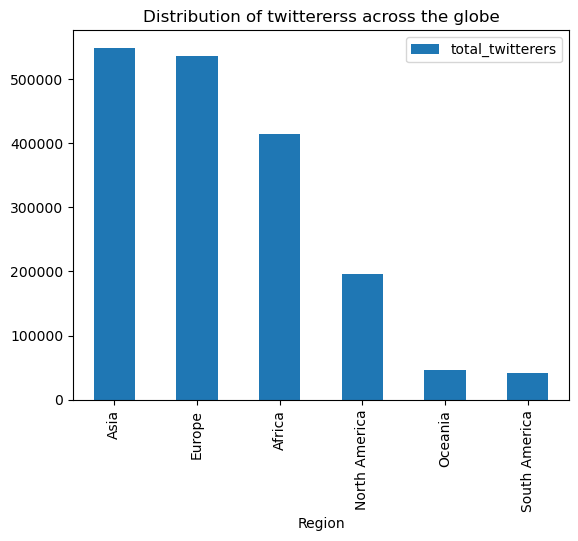

In [18]:
df_loc2.head(6).plot(kind='bar',x='Region', title = 'Distribution of twittererss across the globe')

In [28]:
location_df = filtered_df.select('user_id_str','user_location').distinct()\
.groupBy('user_location')\
.agg(count('*').alias('total_twitterers'))

In [29]:
north_america_countries = my_world.get_countries_list_of('North America')
na_ctry1 = '|'.join(["(" + c +")" for c in north_america_countries])

africa_countries = my_world.get_countries_list_of('Africa')
af_ctry1 = '|'.join(["(" + c +")" for c in africa_countries])

europe_countries = my_world.get_countries_list_of('Europe')
additional_europe_countries = ['London', 'England', 'UK', 'United Kingdom', 'Scotland']
eu_ctry1 = [*europe_countries, *additional_europe_countries]
eu_ctry2 = '|'.join(["(" + c +")" for c in eu_ctry1])

oceania_countries = my_world.get_countries_list_of('Oceania')
oc_ctry1 = '|'.join(["(" + c +")" for c in oceania_countries])

south_america_countries = my_world.get_countries_list_of('South America')
sa_ctry1 = '|'.join(["(" + c +")" for c in south_america_countries])

asia_countries = my_world.get_countries_list_of('Asia')
as_ctry1 = '|'.join(["(" + c +")" for c in asia_countries])

loc_df = location_df\
    .withColumn('Region',when(location_df['user_location'].rlike(na_ctry1), 'North America')\
                .when(location_df['user_location'].rlike(af_ctry1), 'Africa')\
                .when(location_df['user_location'].rlike(sa_ctry1), 'South America')\
                .when(location_df['user_location'].rlike(oc_ctry1), 'Oceania')\
                .when(location_df['user_location'].rlike(eu_ctry2), 'Europe')\
                .when(location_df['user_location'].rlike(as_ctry1), 'Asia')\
                .otherwise(location_df['user_location']))


In [30]:
cont = ['Africa','North America','South America','Asia','Europe','Oceania']
cont1='|'.join(["(" + c +")" for c in cont])

df_loc2 = loc_df.groupBy('Region').agg(sum('total_twitterers').alias('total_twitterers'))\
.orderBy('total_twitterers',ascending=False)\
.na.drop(subset=['Region'])\
.filter(loc_df['Region'].rlike(cont1)).toPandas()

In [31]:
df_loc2.head(6)

,Region,total_twitterers
0,North America,1209
1,Europe,637
2,Asia,302
3,Oceania,83
4,Africa,66
5,South America,29


<AxesSubplot:title={'center':'Distribution of CRT twitterers across the globe'}, xlabel='Region'>

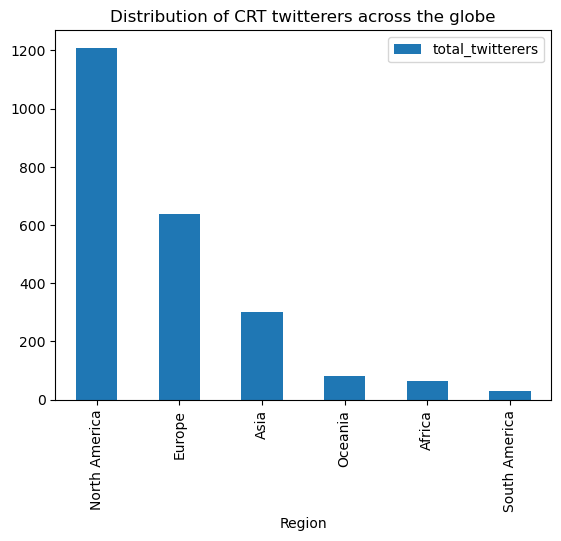

In [34]:
df_loc2.head(6).plot(kind='bar',x='Region', title = 'Distribution of CRT twitterers across the globe')

In [18]:
from pyspark.sql.functions import col, lower

filtered_df = df.filter(
    (lower(col("tweet_text")).contains("hijab"))
)

In [42]:
filtered_df.count()

56003

In [43]:
location_df = filtered_df.select('user_id_str','user_location').distinct()\
.groupBy('user_location')\
.agg(count('*').alias('total_twitterers'))

In [44]:
north_america_countries = my_world.get_countries_list_of('North America')
na_ctry1 = '|'.join(["(" + c +")" for c in north_america_countries])

africa_countries = my_world.get_countries_list_of('Africa')
af_ctry1 = '|'.join(["(" + c +")" for c in africa_countries])

europe_countries = my_world.get_countries_list_of('Europe')
additional_europe_countries = ['London', 'England', 'UK', 'United Kingdom', 'Scotland']
eu_ctry1 = [*europe_countries, *additional_europe_countries]
eu_ctry2 = '|'.join(["(" + c +")" for c in eu_ctry1])

oceania_countries = my_world.get_countries_list_of('Oceania')
oc_ctry1 = '|'.join(["(" + c +")" for c in oceania_countries])

south_america_countries = my_world.get_countries_list_of('South America')
sa_ctry1 = '|'.join(["(" + c +")" for c in south_america_countries])

asia_countries = my_world.get_countries_list_of('Asia')
as_ctry1 = '|'.join(["(" + c +")" for c in asia_countries])

loc_df = location_df\
    .withColumn('Region',when(location_df['user_location'].rlike(na_ctry1), 'North America')\
                .when(location_df['user_location'].rlike(af_ctry1), 'Africa')\
                .when(location_df['user_location'].rlike(sa_ctry1), 'South America')\
                .when(location_df['user_location'].rlike(oc_ctry1), 'Oceania')\
                .when(location_df['user_location'].rlike(eu_ctry2), 'Europe')\
                .when(location_df['user_location'].rlike(as_ctry1), 'Asia')\
                .otherwise(location_df['user_location']))

In [45]:
cont = ['Africa','North America','South America','Asia','Europe','Oceania']
cont1='|'.join(["(" + c +")" for c in cont])

df_loc2 = loc_df.groupBy('Region').agg(sum('total_twitterers').alias('total_twitterers'))\
.orderBy('total_twitterers',ascending=False)\
.na.drop(subset=['Region'])\
.filter(loc_df['Region'].rlike(cont1)).toPandas()

<AxesSubplot:title={'center':'Distribution of hijab twitterers across the globe'}, xlabel='Region'>

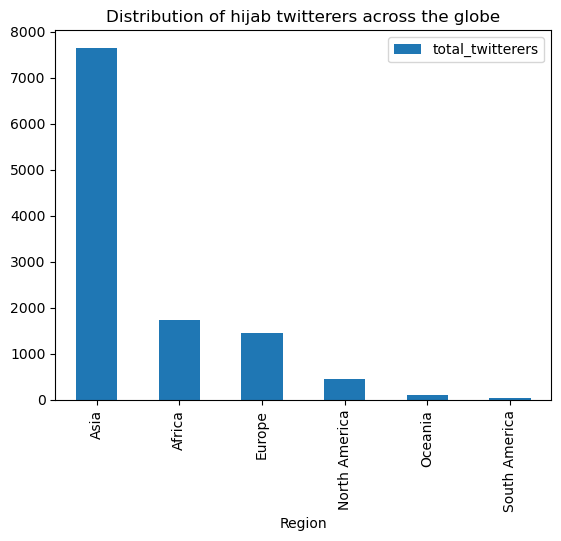

In [47]:
df_loc2.head(6).plot(kind='bar',x='Region', title = 'Distribution of hijab twitterers across the globe')

In [ ]:
from pyspark.sql.functions import col, lower, regexp_extract

filtered_df = df.filter(df.tweet_retweeted_status.isNull() & 
                         lower(col("tweet_text")).rlike("\\bhijab\\b"))



In [51]:
filtered_df.count()

3617

In [ ]:
location_df = filtered_df.select('user_id_str','user_location').distinct()\
.groupBy('user_location')\
.agg(count('*').alias('total_twitterers'))

In [ ]:
north_america_countries = my_world.get_countries_list_of('North America')
na_ctry1 = '|'.join(["(" + c +")" for c in north_america_countries])

africa_countries = my_world.get_countries_list_of('Africa')
af_ctry1 = '|'.join(["(" + c +")" for c in africa_countries])

europe_countries = my_world.get_countries_list_of('Europe')
additional_europe_countries = ['London', 'England', 'UK', 'United Kingdom', 'Scotland']
eu_ctry1 = [*europe_countries, *additional_europe_countries]
eu_ctry2 = '|'.join(["(" + c +")" for c in eu_ctry1])

oceania_countries = my_world.get_countries_list_of('Oceania')
oc_ctry1 = '|'.join(["(" + c +")" for c in oceania_countries])

south_america_countries = my_world.get_countries_list_of('South America')
sa_ctry1 = '|'.join(["(" + c +")" for c in south_america_countries])

asia_countries = my_world.get_countries_list_of('Asia')
as_ctry1 = '|'.join(["(" + c +")" for c in asia_countries])

loc_df = location_df\
    .withColumn('Region',when(location_df['user_location'].rlike(na_ctry1), 'North America')\
                .when(location_df['user_location'].rlike(af_ctry1), 'Africa')\
                .when(location_df['user_location'].rlike(sa_ctry1), 'South America')\
                .when(location_df['user_location'].rlike(oc_ctry1), 'Oceania')\
                .when(location_df['user_location'].rlike(eu_ctry2), 'Europe')\
                .when(location_df['user_location'].rlike(as_ctry1), 'Asia')\
                .otherwise(location_df['user_location']))

In [ ]:
cont = ['Africa','North America','South America','Asia','Europe','Oceania']
cont1='|'.join(["(" + c +")" for c in cont])

df_loc2 = loc_df.groupBy('Region').agg(sum('total_twitterers').alias('total_twitterers'))\
.orderBy('total_twitterers',ascending=False)\
.na.drop(subset=['Region'])\
.filter(loc_df['Region'].rlike(cont1)).toPandas()

<AxesSubplot:title={'center':'Distribution of hijab original tweets across the globe'}, xlabel='Region'>

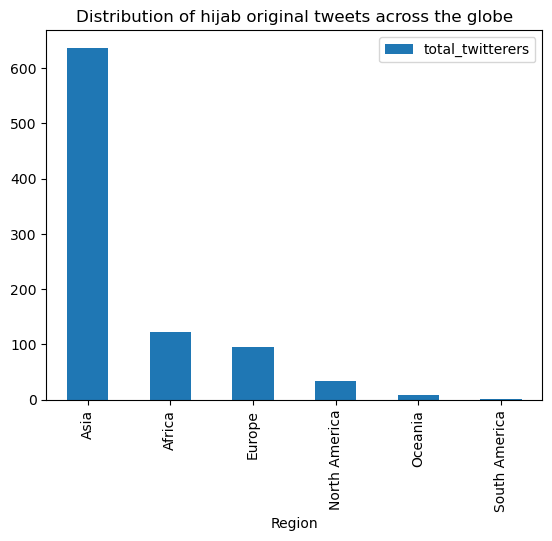

In [ ]:
df_loc2.head(6).plot(kind='bar',x='Region', title = 'Distribution of hijab original tweets across the globe')

In [ ]:
from pyspark.sql.functions import col, lower, regexp_extract

filtered_df = df.filter(df.tweet_retweeted_status.isNotNull() & 
                         lower(col("tweet_text")).rlike("\\bhijab\\b"))

In [ ]:
filtered_df.count()

44717

In [ ]:
location_df = filtered_df.select('user_id_str','user_location').distinct()\
.groupBy('user_location')\
.agg(count('*').alias('total_twitterers'))

In [ ]:
north_america_countries = my_world.get_countries_list_of('North America')
na_ctry1 = '|'.join(["(" + c +")" for c in north_america_countries])

africa_countries = my_world.get_countries_list_of('Africa')
af_ctry1 = '|'.join(["(" + c +")" for c in africa_countries])

europe_countries = my_world.get_countries_list_of('Europe')
additional_europe_countries = ['London', 'England', 'UK', 'United Kingdom', 'Scotland']
eu_ctry1 = [*europe_countries, *additional_europe_countries]
eu_ctry2 = '|'.join(["(" + c +")" for c in eu_ctry1])

oceania_countries = my_world.get_countries_list_of('Oceania')
oc_ctry1 = '|'.join(["(" + c +")" for c in oceania_countries])

south_america_countries = my_world.get_countries_list_of('South America')
sa_ctry1 = '|'.join(["(" + c +")" for c in south_america_countries])

asia_countries = my_world.get_countries_list_of('Asia')
as_ctry1 = '|'.join(["(" + c +")" for c in asia_countries])

loc_df = location_df\
    .withColumn('Region',when(location_df['user_location'].rlike(na_ctry1), 'North America')\
                .when(location_df['user_location'].rlike(af_ctry1), 'Africa')\
                .when(location_df['user_location'].rlike(sa_ctry1), 'South America')\
                .when(location_df['user_location'].rlike(oc_ctry1), 'Oceania')\
                .when(location_df['user_location'].rlike(eu_ctry2), 'Europe')\
                .when(location_df['user_location'].rlike(as_ctry1), 'Asia')\
                .otherwise(location_df['user_location']))

In [ ]:
cont = ['Africa','North America','South America','Asia','Europe','Oceania']
cont1='|'.join(["(" + c +")" for c in cont])

df_loc2 = loc_df.groupBy('Region').agg(sum('total_twitterers').alias('total_twitterers'))\
.orderBy('total_twitterers',ascending=False)\
.na.drop(subset=['Region'])\
.filter(loc_df['Region'].rlike(cont1)).toPandas()

<AxesSubplot:title={'center':'Distribution of hijab retweets across the globe'}, xlabel='Region'>

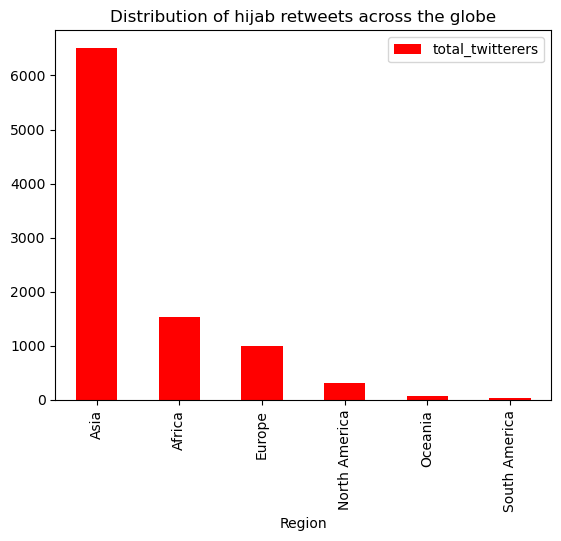

In [ ]:
df_loc2.head(6).plot(kind='bar',x='Region', title = 'Distribution of hijab retweets across the globe', color ='red')

In [16]:
from pyspark.sql.functions import count, date_format, to_timestamp, col, when

# Select necessary columns from the dataframe
location_df = df.select('user_id_str', 'user_location', 'tweet_created_at').distinct()

# Filter to include only Asian countries
asia_countries = my_world.get_countries_list_of('Asia')
as_ctry1 = '|'.join(["(" + c + ")" for c in asia_countries])

loc_df = location_df \
    .filter(location_df['user_location'].rlike(as_ctry1)) \
    .withColumn('Region', when(location_df['user_location'].rlike(as_ctry1), 'Asia')) \
    .drop('user_location') \
    .filter(col('Region') == 'Asia')

# Convert tweet_created_at to timestamp format
loc_df = loc_df.withColumn("tweet_created_at", to_timestamp(col("tweet_created_at"), "EEE MMM dd HH:mm:ss ZZZZZ yyyy"))

# Group tweets by date and count the number of tweets for each day
tweets_by_month = loc_df \
    .groupBy(date_format("tweet_created_at", "yyyy-MM").alias("year_month")) \
    .agg(count('*').alias('count')) \
    .sort("year_month") \
    .select('year_month', 'count')


+----------+------+
|year_month| count|
+----------+------+
|   2022-04|170823|
|   2022-05|195033|
|   2022-06|178338|
|   2022-07|166510|
|   2022-08|189660|
|   2022-09|220416|
|   2022-10|185431|
|   2022-11|184682|
|   2022-12|158495|
|   2023-01|150127|
|   2023-02| 37327|
+----------+------+



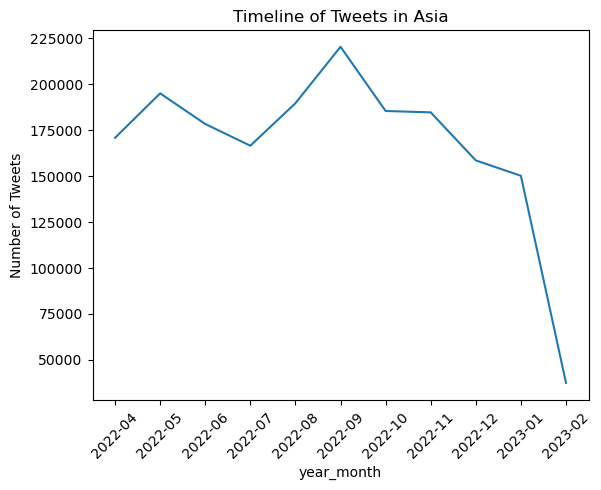

In [17]:
# Convert tweet_created_at to timestamp format
loc_df = loc_df.withColumn("tweet_created_at", to_timestamp(col("tweet_created_at"), "EEE MMM dd HH:mm:ss ZZZZZ yyyy"))

# Group tweets by date and count the number of tweets for each day
timeline_hij = loc_df.groupBy(date_format("tweet_created_at", "yyyy-MM").alias("year_month")).count().sort("year_month")

# Show timeline
timeline_hij.show()

# Plot timeline
import matplotlib.pyplot as plt

year_months = [row.year_month for row in tweets_by_month.collect()]
counts = [row['count'] for row in tweets_by_month.collect()]

plt.plot(year_months, counts)
plt.title("Timeline of Tweets in Asia")
plt.xlabel("year_month")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45) 
plt.show()

In [19]:
from pyspark.sql.functions import count, date_format, to_timestamp, col, when

# Select necessary columns from the dataframe
location_df = filtered_df.select('user_id_str', 'user_location', 'tweet_created_at').distinct()

# Filter to include only Asian countries
asia_countries = my_world.get_countries_list_of('Asia')
as_ctry1 = '|'.join(["(" + c + ")" for c in asia_countries])

loc_df = location_df \
    .filter(location_df['user_location'].rlike(as_ctry1)) \
    .withColumn('Region', when(location_df['user_location'].rlike(as_ctry1), 'Asia')) \
    .drop('user_location') \
    .filter(col('Region') == 'Asia')

# Convert tweet_created_at to timestamp format
loc_df = loc_df.withColumn("tweet_created_at", to_timestamp(col("tweet_created_at"), "EEE MMM dd HH:mm:ss ZZZZZ yyyy"))

# Group tweets by date and count the number of tweets for each day
tweets_by_month = loc_df \
    .groupBy(date_format("tweet_created_at", "yyyy-MM").alias("year_month")) \
    .agg(count('*').alias('count')) \
    .sort("year_month") \
    .select('year_month', 'count')

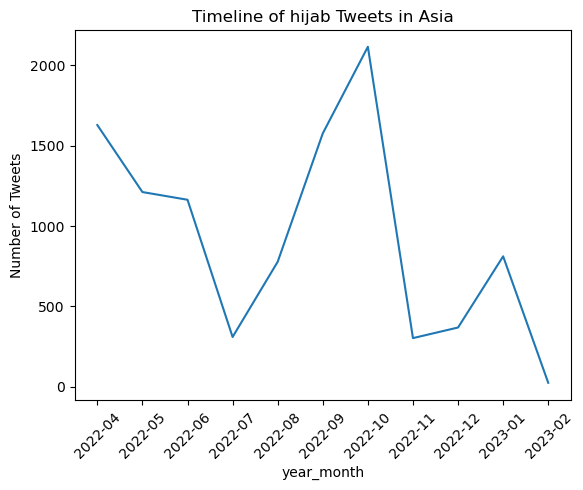

In [ ]:
# Convert tweet_created_at to timestamp format
loc_df = loc_df.withColumn("tweet_created_at", to_timestamp(col("tweet_created_at"), "EEE MMM dd HH:mm:ss ZZZZZ yyyy"))

# Group tweets by date and count the number of tweets for each day
timeline_hij = loc_df.groupBy(date_format("tweet_created_at", "yyyy-MM").alias("year_month")).count().sort("year_month")

# Show timeline
timeline_hij.show()

# Plot timeline
import matplotlib.pyplot as plt

year_months = [row.year_month for row in tweets_by_month.collect()]
counts = [row['count'] for row in tweets_by_month.collect()]

plt.plot(year_months, counts)
plt.title("Timeline of hijab Tweets in Asia")
plt.xlabel("year_month")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45) 
plt.show()

In [ ]:
# Keywords for government organizations
govt_keywords = ['republic', 'congress', 'parliament', 'senate', 'president', 'democrat', 'republican',
                 'prime minister', 'constitution', 'MLA', 'mla', 'gov', 'u.s.', 'U.S.', 'US', 'united states', 
                 'federal', 'state', 'department', 'agency', 'ministry']

# Keywords for news organizations
news_keywords = ['news', 'newspaper', 'times', 'post', 'journal', 'gazette', 'chronicle', 'press', 
                 'daily', 'weekly', 'report', 'broadcast', 'radio', 'television']

# Keywords for celebrity organizations
celeb_keywords = ['actor', 'singer', 'writer', 'musician', 'actress', 'author', 'golfer', 'athlete',
                  'comedian', 'performer', 'director', 'producer', 'model']

# Keywords for education organizations
edu_keywords = ['school', 'university', 'college', 'learning', 'academy', 'institute', 'research', 
                'teaching', 'master', 'graduate', 'undergraduate', 'elementary', 'secondary', 
                'high school', 'middle school', 'teacher', 'professor', 'student', 'education']

# Keywords for non-profit organizations
nonprofit_keywords = ['nonprofit', 'charity', 'foundation', 'ngo', 'humanitarian', 'aid']

# Concatenate keywords with OR operator
govt_regex = '|'.join(["(" + k + ")" for k in govt_keywords])
news_regex = '|'.join(["(" + k + ")" for k in news_keywords])
celeb_regex = '|'.join(["(" + k + ")" for k in celeb_keywords])
edu_regex = '|'.join(["(" + k + ")" for k in edu_keywords])
nonprofit_regex = '|'.join(["(" + k + ")" for k in nonprofit_keywords])

# Apply organization labels to DataFrame
df_orgs = df_users \
    .withColumn('Organisation', 
                when(df_users['user_verified'] == False, 'Other')
                .when((df_users['user_name'].rlike(news_regex)) | (df_users['user_description_lower'].rlike(news_regex)), 'News')
                .when((df_users['user_name'].rlike(govt_regex)) | (df_users['user_description_lower'].rlike(govt_regex)), 'Government')
                .when((df_users['user_description_lower'].rlike(celeb_regex)) & (df_users['followers_count'] > 25000), 'Celebrity')
                .when((df_users['user_name'].rlike(edu_regex)) | (df_users['user_description_lower'].rlike(edu_regex)), 'Education')
                .when((df_users['user_name'].rlike(nonprofit_regex)) | (df_users['user_description_lower'].rlike(nonprofit_regex)), 'Nonprofit')
                .when(df_users['followers_count'] > 1000, 'Influencer')
                .otherwise('Other')) \
    .drop('user_description_lower')


In [9]:
%time

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.54 µs
